In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import numpy as np

In [10]:
vanilla = pd.read_csv('per_moa_performance/level5_vanilla_moa_performance.csv').set_index('MOA')['zscore']
vanilla_leaveOut = pd.read_csv('per_moa_performance/level5_vanilla_leaveOut_moa_performance.csv').set_index('MOA')['zscore']
beta = pd.read_csv('per_moa_performance/level5_beta_moa_performance.csv').set_index('MOA')['zscore']
beta_leaveOut = pd.read_csv('per_moa_performance/level5_beta_leaveOut_moa_performance.csv').set_index('MOA')['zscore']
mmd = pd.read_csv('per_moa_performance/level5_mmd_moa_performance.csv').set_index('MOA')['zscore']
mmd_leaveOut = pd.read_csv('per_moa_performance/level5_mmd_leaveOut_moa_performance.csv').set_index('MOA')['zscore']

In [11]:
vanilla_df = pd.concat([vanilla, vanilla_leaveOut], axis = 1)
beta_df = pd.concat([beta, beta_leaveOut], axis = 1)
mmd_df = pd.concat([mmd, mmd_leaveOut], axis = 1)

In [12]:
vanilla_df = pd.DataFrame(- np.log(stats.norm.sf(-(vanilla_df)))).reset_index().assign(moaType = 'Not left out')
beta_df = pd.DataFrame(- np.log(stats.norm.sf(-(beta_df)))).reset_index().assign(moaType = 'Not left out')
mmd_df = pd.DataFrame(- np.log(stats.norm.sf(-(mmd_df)))).reset_index().assign(moaType = 'Not left out')

In [13]:
vanilla_df.loc[vanilla_df.index < 5, 'moaType'] = 'Left out'
beta_df.loc[beta_df.index < 5, 'moaType'] = 'Left out'
mmd_df.loc[mmd_df.index < 5, 'moaType'] = 'Left out'

In [14]:
vanilla_df = vanilla_df.rename(columns = {'moaType': ''})
beta_df = beta_df.rename(columns = {'moaType': ''})
mmd_df = mmd_df.rename(columns = {'moaType': ''})

In [17]:
sns.set_theme()
sns.set(font_scale=.5)

Text(0, 0.5, 'MMD-VAE leave out -log pvalue')

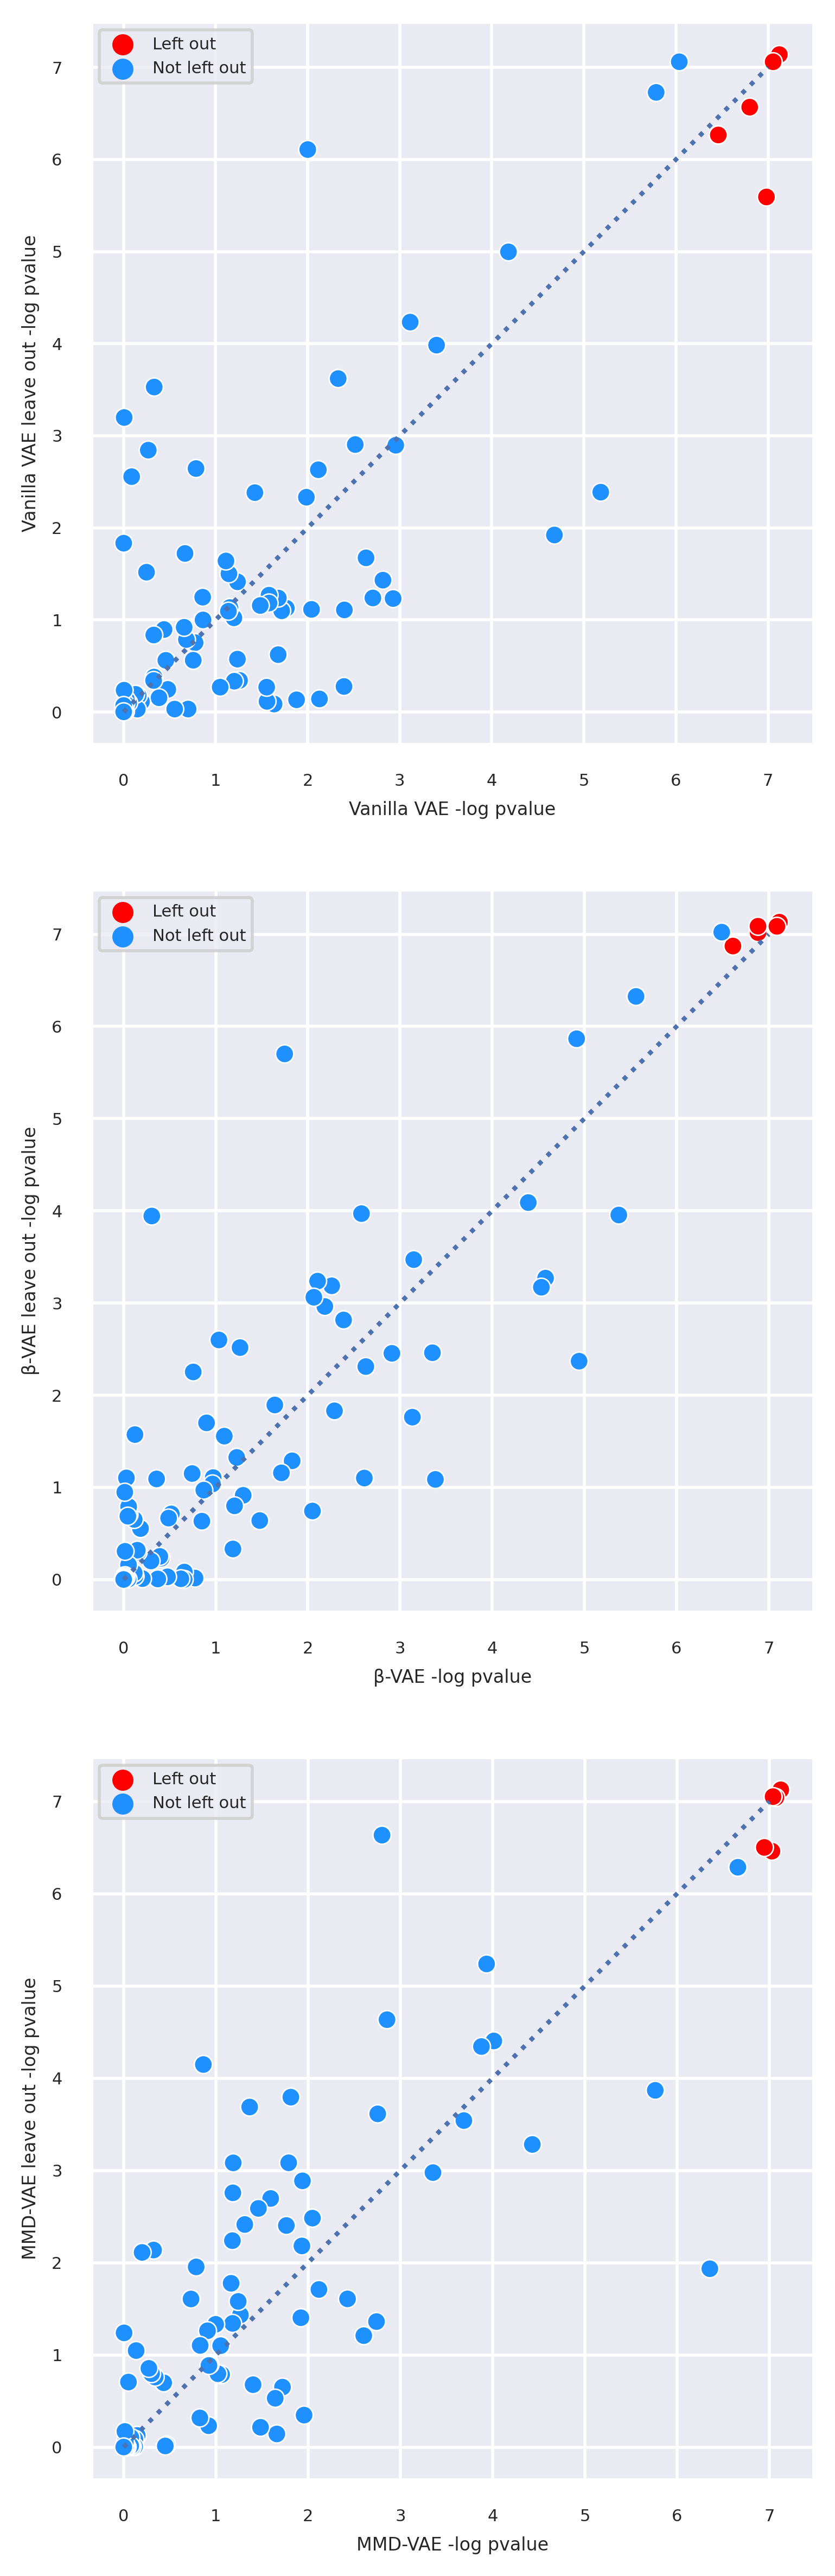

In [18]:
fig, (ax1, ax2, ax3) = plt.subplots(3,1, figsize = (8,15), dpi=400)
sns.scatterplot(data = vanilla_df, x = 0, y = 1, hue = '', palette = ['red', 'dodgerblue'], ax = ax1)
sns.scatterplot(data = beta_df, x = 0, y = 1, hue = '', palette = ['red', 'dodgerblue'], ax = ax2)
sns.scatterplot(data = mmd_df, x = 0, y = 1, hue = '', palette = ['red', 'dodgerblue'], ax = ax3)


ax1.axis('square')
ax2.axis('square')
ax3.axis('square')

x = np.arange(0,8)
ax1.plot(x,x,':')
ax2.plot(x,x,':')
ax3.plot(x,x,':')

ax1.set_xlabel('Vanilla VAE -log pvalue')
ax1.set_ylabel('Vanilla VAE leave out -log pvalue')
ax2.set_xlabel('β-VAE -log pvalue')
ax2.set_ylabel('β-VAE leave out -log pvalue')
ax3.set_xlabel('MMD-VAE -log pvalue')
ax3.set_ylabel('MMD-VAE leave out -log pvalue')
